In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some, axes_dict
from csbdeep.io import save_training_data
from csbdeep.data import RawData, create_patches
from csbdeep.data.transform import anisotropic_distortions


Bad key "text.kerning_factor" on line 4 in
C:\Users\aryan\anaconda3\envs\csb_bio\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Notice that the source and target are the same folder - which means it will use the image in that given folder to produce semi synthetic data

In [3]:
raw_data = RawData.from_folder (
    basepath    = 'data',
    source_dirs = ['retina'],
    target_dir  = 'retina',
    axes        = 'CYX',
)

I changed the Sub Sampling factor from 10.2 to 5.1 


psf_axes = If None, psf axes are assumed to be the same as of the image that it is applied to

psf = Point spread function (PSF) that is supposed to mimic blurring of the microscope due to reduced axial resolution. Set to None to disable.

Read the docs for more info: 
http://csbdeep.bioimagecomputing.com/doc/datagen.html#anisotropic-distortions

In [4]:
anisotropic_transform = anisotropic_distortions (
    subsample = 5.1,
    psf       = np.ones((3,3))/9, # use the actual PSF here
    psf_axes  = None,
)


Make sure the patch size matches the patch size in the Training data set that we created before

In [5]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (256,256),
    n_patches_per_image = 1,
    transforms          = [anisotropic_transform],
)

   15 raw images x    1 transformations   =    15 images
   15 images     x    1 patches per image =    15 patches in total
Input data:
data: target='retina', sources=['retina'], axes='CYX', pattern='*.tif*'
Transformations:
1 x Anisotropic distortion (along X axis)
Patch size:
256 x 256


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 15.70it/s]


In [6]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (15, 1, 256, 256)
axes  of X,Y = SCYX


In [7]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (15, 1, 256, 256)
axes  of X,Y = SCYX


In [12]:
XY_axes

'SCYX'

In [9]:
save_training_data('data/synthImg.npz', X, Y, 'SCYX')

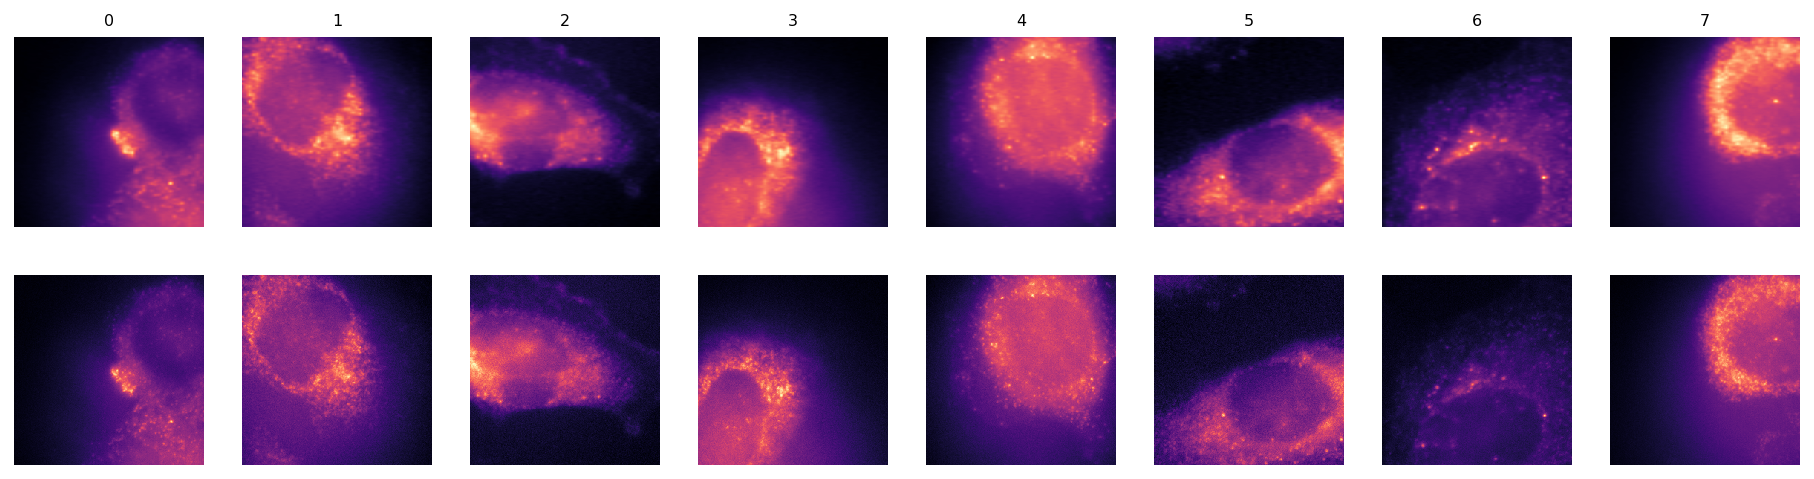

In [43]:
for i in range(1):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1))
    plot_some(np.moveaxis(X[sl],1,-1),np.moveaxis(Y[sl],1,-1),title_list=[np.arange(sl.start,sl.stop)])
    plt.show()
None;